In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
Diabetic_data = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
Diabetic_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [8]:
Diabetic_data.shape

(768, 9)

In [3]:
Diabetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
Diabetic_data.Pregnancies.unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [5]:
Diabetic_data.Outcome.unique()

array([1, 0])

In [6]:
Features = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
X = Diabetic_data[Features]
X

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

In [7]:
y = Diabetic_data.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [8]:
Diabetic_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

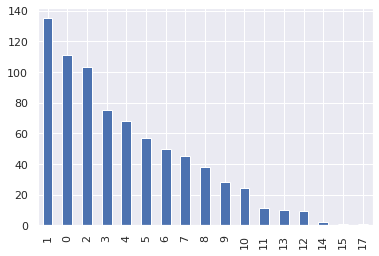

In [9]:
import seaborn as sns
sns.set()
pregnancy_counts = Diabetic_data['Pregnancies'].value_counts()
pregnancy_counts.plot(kind='bar')


<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

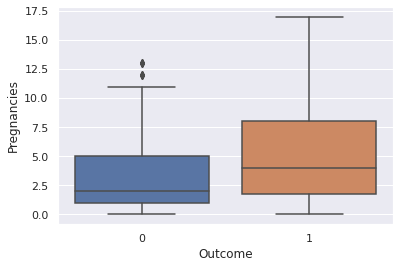

In [10]:
sns.boxplot(x='Outcome', y="Pregnancies", data=Diabetic_data)

In [11]:

# Position of the Outlier
outlier_preg = np.where((Diabetic_data['Pregnancies']>10) & (Diabetic_data['Outcome'] == 0))
outlier_preg

(array([ 28,  36,  86, 274, 333, 358, 436, 518, 558, 559, 582, 658, 744,
        745]),)

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

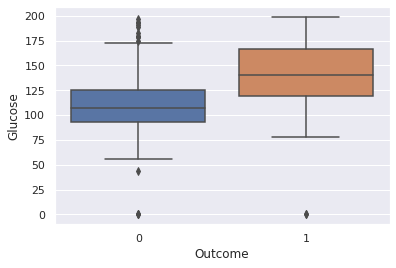

In [12]:
sns.boxplot(x='Outcome', y="Glucose", data=Diabetic_data)

In [13]:
# Position of the Outlier
outlier_gluc = np.where(((Diabetic_data['Glucose']>=0) & (Diabetic_data['Glucose']<= 50))  & (Diabetic_data['Outcome'] == 0))
outlier_gluc

(array([ 62,  75, 182, 342]),)

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

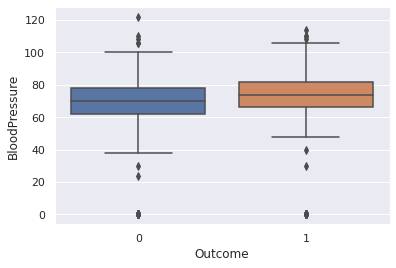

In [14]:
sns.boxplot(x='Outcome', y="BloodPressure", data=Diabetic_data)

In [15]:
Diabetic_data.BloodPressure.unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114])

In [16]:
outlier_bp_0 = np.where(((Diabetic_data['BloodPressure']>100) & (Diabetic_data['BloodPressure']<= 130))  & (Diabetic_data['Outcome'] == 0))
outlier_bp_1 = np.where(((Diabetic_data['BloodPressure']>110) & (Diabetic_data['BloodPressure']<= 120))  & (Diabetic_data['Outcome'] == 1))
print(outlier_bp_0)
print(outlier_bp_1)

(array([106, 362, 549, 658, 672]),)
(array([691]),)


<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

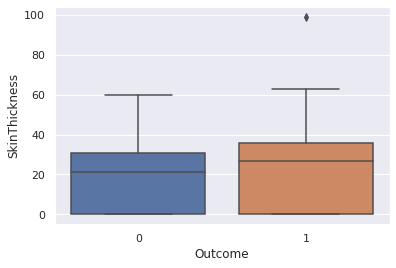

In [17]:
sns.boxplot(x='Outcome', y="SkinThickness", data=Diabetic_data)

In [18]:
outlier_skin = np.where(((Diabetic_data['SkinThickness']>80) & (Diabetic_data['SkinThickness']<= 110))  & (Diabetic_data['Outcome'] == 1))
outlier_skin

(array([579]),)

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

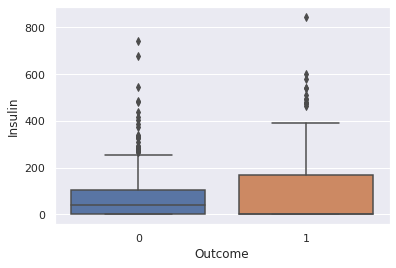

In [19]:
sns.boxplot(x='Outcome', y="Insulin", data=Diabetic_data)

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

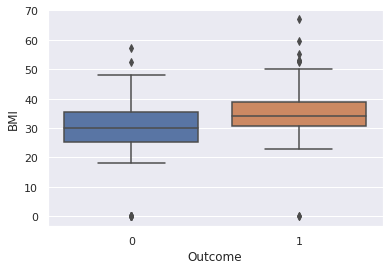

In [20]:
sns.boxplot(x='Outcome', y="BMI", data=Diabetic_data)

In [21]:
outlier_bmi_0 = np.where(((Diabetic_data['BMI']>=0) & (Diabetic_data['BMI']<=10))  & (Diabetic_data['Outcome'] == 0))
outlier_bmi_1 = np.where(((Diabetic_data['BMI']>=0) & (Diabetic_data['BMI']<=10))  & (Diabetic_data['Outcome'] == 1))

print(outlier_bmi_0)
print(outlier_bmi_1) 

(array([ 49,  60,  81, 145, 371, 426, 494, 522, 684]),)
(array([  9, 706]),)


<AxesSubplot:xlabel='Outcome', ylabel='Age'>

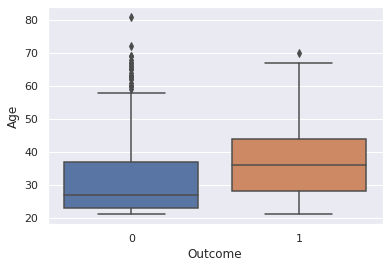

In [22]:
sns.boxplot(x='Outcome', y="Age", data=Diabetic_data)

In [23]:
def unique(list1):
    x = np.array(list1)
    print(np.unique(x))
    
 
Drop = [ 28,  36,  86, 274, 333, 358, 436, 518, 558, 559, 582, 658, 744,745, 62,  75, 182, 342,106, 362, 549, 658, 672,691,579,9, 706,49,  60,  81, 145, 371, 426, 494, 522, 684]
print(len(Drop))
unique(Drop)

36
[  9  28  36  49  60  62  75  81  86 106 145 182 274 333 342 358 362 371
 426 436 494 518 522 549 558 559 579 582 658 672 684 691 706 744 745]


In [24]:
Diabetic_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [25]:
from pandas_profiling import ProfileReport
profile = ProfileReport(Diabetic_data, explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
Diabetic_data =  Diabetic_data.drop(index = [9,28,36,49,60,62,75,81,86,106,145,182,274,333,342,358,362,371,426,436,494,518,522,549,558,559,579,582,658,672,684,691,706,744,745])

In [31]:
Diabetic_data. shape

(733, 9)

In [32]:
abs(Diabetic_data.corr()['Outcome'].sort_values(ascending=False))

Outcome                     1.000000
Glucose                     0.469509
BMI                         0.316611
Pregnancies                 0.266797
Age                         0.255239
DiabetesPedigreeFunction    0.174912
Insulin                     0.122250
SkinThickness               0.067567
BloodPressure               0.064815
Name: Outcome, dtype: float64

In [11]:
from sklearn.metrics import accuracy_score


In [37]:
from sklearn.model_selection import train_test_split,StratifiedKFold


In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=1)

In [17]:
#decision Tree
from sklearn.tree import DecisionTreeRegressor
iowa_model = DecisionTreeRegressor(random_state=0)
iowa_model.fit(X_train, y_train)
Predict_1 = iowa_model.predict(X_val)
print(Predict_1)
print()
print(accuracy_score(Predict_1, y_val))

[0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

0.7272727272727273


In [37]:
#random Forests
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=70, random_state=1)
clf = clf.fit(X_train, y_train)
Predict_2 = clf.predict(X_val)
print(Predict_2)
print()
print(accuracy_score(Predict_2, y_val))

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0
 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0]

0.8181818181818182


In [39]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [40]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_val_std = sc.transform(X_val)

In [41]:
#Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear')
 
# Fit the model
svc.fit(X_train_std, y_train)
y_predict = svc.predict(X_val_std)
print()
print(accuracy_score(y_predict, y_val))


0.7792207792207793


In [42]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators = 30,random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print()
print(accuracy_score(y_pred, y_val))


0.8181818181818182


In [43]:
#Naive bayes
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


In [44]:
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_val = sc.transform(X_val) 

In [45]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train) 

GaussianNB()

In [52]:
y_pred_nb = classifier.predict(X_val)
print(accuracy_score(y_pred_nb, y_val))

0.7727272727272727


In [55]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_val, y_pred_nb)  
cm

array([[85, 14],
       [21, 34]])

In [2]:
pip install auto-sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 4.9 MB/s eta 0:00:0000:0100:010m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 12.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 19.1 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 19.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.9/260.9 kB 21.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 3.6 MB/s eta 0:00:00
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641946 sha256=0c87fea2a4b63d17fe13d3d76bec8d69b6d977de9e7ec0211b2f008751de725a
  Stored in directory: /root/.cache/pip/wheels/26/57/ce/c

In [39]:
import autosklearn.classification as ac
from autosklearn.metrics import (accuracy,
                                 f1,
                                 roc_auc,
                                 precision,
                                 average_precision,
                                 recall,
                                 log_loss)

In [40]:
skf = StratifiedKFold(n_splits=5)
model = ac.AutoSklearnClassifier(
    time_left_for_this_task=5*60,
    per_run_time_limit=30,resampling_strategy=skf,
                            ensemble_size = 3,
                            metric = average_precision
)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `ensemble_size` has been deprecated, please use `ensemble_kwargs = {'ensemble_size': 3}`. Inserting `ensemble_size` into `ensemble_kwargs` for now. `ensemble_size` will be removed in auto-sklearn 0.16.
  


In [41]:
model.fit(X_train, y_train)

AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      ensemble_kwargs={'ensemble_size': 3}, ensemble_size=3,
                      metric=average_precision, per_run_time_limit=30,
                      resampling_strategy=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                      time_left_for_this_task=300)

In [31]:
print(accuracy_score(model.predict(X_val), y_val))

0.7857142857142857


In [34]:
model.predict(X_val)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])